<a href="https://colab.research.google.com/github/JefNtungila/New_York_Footfall_Analysis/blob/master/New_York_footfall_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEW YORK FOOTFALL ANALYSIS

## Costcos case study using mobile data




Social distancing measures changed life as we knew it. We we're interested in analysing what that meant in terms of footfall in New York. We use Costcos in New York as a case study and calculate footfall within the shops using Predicio Mobile Data.

# Installation

In [0]:
%%time

#increase ram *******************run this cell untilt notebook crashes then increase ram to 24GB *********

a = []
while(1):
    a.append('1')


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install awscli
## Successfully installed awscli-1.16.309 botocore-1.13.45 colorama-0.4.1 rsa-3.4.2
## You must restart the runtime in order to use newly installed versions.

     |████████████████████████████████| 3.0MB 2.8MB/s 
     |████████████████████████████████| 6.2MB 21.8MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
  Found existing installation: botocore 1.16.4
    Uninstalling botocore-1.16.4:
      Successfully uninstalled botocore-1.16.4
  Found existing installation: rsa 4.0
    Uninstalling rsa-4.0:
      Successfully uninstalled rsa-4.0


# Config AWS Keys

Or could use `!aws configure` to manually config every time

In [1]:
# # write AWS CLI keys to a file (only do this once)

text = '''
[default]
aws_access_key_id= ...........................
aws_secret_access_key= .............................
region=us-east-2
'''
path = "/content/drive/My Drive/config/awscli.ini"
with open(path, 'w') as f:
    f.write(text)
# check AWS CLI key file
!cat /content/drive/My\ Drive/config/awscli.ini

FileNotFoundError: ignored

In [0]:
# # https://github.com/aws/aws-cli
# # config environment variable
!export AWS_SHARED_CREDENTIALS_FILE=/content/drive/My\ Drive/config/awscli.ini
import os
path = "/content/drive/My Drive/config/awscli.ini"
os.environ['AWS_SHARED_CREDENTIALS_FILE'] = path
print(os.environ['AWS_SHARED_CREDENTIALS_FILE'])

/content/drive/My Drive/config/awscli.ini


# Get files from AWS S3

In [0]:
%%time

!aws s3 ls s3://predicio-samples/data_analytics/ --recursive --human-readable --summarize

2020-03-20 09:26:25   55.1 MiB data_analytics/20200320/NY.csv
2020-04-22 09:32:06   24.0 MiB data_analytics/20200421/2020/04/19/NYC-08-part0000.csv.gz
2020-04-22 10:32:07   28.6 MiB data_analytics/20200421/2020/04/19/NYC-09-part0000.csv.gz
2020-04-22 11:33:09   30.0 MiB data_analytics/20200421/2020/04/19/NYC-10-part0000.csv.gz
2020-04-22 12:33:08   38.9 MiB data_analytics/20200421/2020/04/19/NYC-11-part0000.csv.gz
2020-04-22 13:33:09   49.1 MiB data_analytics/20200421/2020/04/19/NYC-12-part0000.csv.gz
2020-04-22 14:39:11   58.4 MiB data_analytics/20200421/2020/04/19/NYC-13-part0000.csv.gz
2020-04-22 15:36:11   66.3 MiB data_analytics/20200421/2020/04/19/NYC-14-part0000.csv.gz
2020-04-22 16:42:12   73.5 MiB data_analytics/20200421/2020/04/19/NYC-15-part0000.csv.gz
2020-04-22 17:38:13   76.9 MiB data_analytics/20200421/2020/04/19/NYC-16-part0000.csv.gz
2020-04-22 18:35:14   79.6 MiB data_analytics/20200421/2020/04/19/NYC-17-part0000.csv.gz
2020-04-22 19:34:13   82.1 MiB data_analytics/20

In [0]:
%%time

string = "20200421/2020/04/23/NYC*"

!aws s3 cp s3://predicio-samples/data_analytics/ ./ --recursive \
        --exclude "*" --include {string}

download: s3://predicio-samples/data_analytics/20200421/2020/04/23/NYC-00-part0002.csv.gz to 20200421/2020/04/23/NYC-00-part0002.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/04/23/NYC-01-part0002.csv.gz to 20200421/2020/04/23/NYC-01-part0002.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/04/23/NYC-00-part0001.csv.gz to 20200421/2020/04/23/NYC-00-part0001.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/04/23/NYC-01-part0000.csv.gz to 20200421/2020/04/23/NYC-01-part0000.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/04/23/NYC-00-part0000.csv.gz to 20200421/2020/04/23/NYC-00-part0000.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/04/23/NYC-01-part0001.csv.gz to 20200421/2020/04/23/NYC-01-part0001.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/04/23/NYC-02-part0002.csv.gz to 20200421/2020/04/23/NYC-02-part0002.csv.gz
download: s3://predicio-samples/data_analytics/2

In [0]:
!rm -rf /content/20200421/2020/*

2020


# Data Wrangling and Exploration

At least one mobile data file per hour.
Sometimes 2 or more per hour.
Each file contains 2 million or more observations.
We create a dataframe where we sample 50000 observations per hour.


In [0]:
import pandas as pd
from datetime import datetime, date, time, timedelta
import pytz
from geopy import distance
from tqdm import tqdm_notebook as tqdm

In [0]:
def wrangle(X):


  X = X.copy()

  # X = X.sample(50000) 
  
  X['date_EST'] = pd.to_datetime(X['timestamp'], unit='s')
  X['date_EST'] = X['date_EST'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
  X['date'] = X['date_EST'].dt.date
  X['hour']  = X['date_EST'].dt.hour
  

  return X


# df['day'] = df['date_EST'].apply(lambda x: x.strftime('%B %d %H:%M')) 


In [0]:
%%time

# ************** 10 minutes to read and wrangle 1 day of relevant data******* ******
# ****************************** refractoring using SPARK ******************************************

df_container = []
total_rows = 0

cols = ['timestamp', 'lat', 'lng']

for i in tqdm(range(24)): 

  #can change range and loop to read all files

  i = str(i).zfill(2)

  for j in range(5):

    try:

      df = pd.read_csv(f'20200421/2020/04/21/NYC-{i}-part000{j}.csv.gz', 
                      delimiter = '\t', error_bad_lines=False, 
                      usecols = cols)
      
      #keeping track of the total amount of rows for reference
      rows, _ = df.shape
      total_rows += rows

      #selecting only data that is in the area of interest while reading the data in
      df = df[(df['lat'] > 40) & (df['lat'] < 41) & (df['lng'] < -72) & (df['lng'] > -74)] 
      df = wrangle(df)
      df_container.append(df)

    except:
      continue


df_sample = pd.concat([df for df in df_container])
print(df_sample.shape)
print(total_rows)


df_sample.to_csv('sample_NY_footfall.csv')
!cp sample_NY_footfall.csv 'drive/My Drive/'
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.



(2650000, 6)
199227482
CPU times: user 7min 46s, sys: 5.85 s, total: 7min 52s
Wall time: 7min 56s


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# import pandas as pd
# df_sample = pd.read_csv('/content/drive/My Drive/sample_NY_footfall.csv')

In [0]:
df_sample.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,2.65e+06,NaN,NaN,NaN,1.88109e+06,1.45149e+06,0,591438,1.59017e+06,3.01135e+06,5e+06
timestamp,2.65e+06,NaN,NaN,NaN,1.58747e+09,27645.3,1.58743e+09,1.58744e+09,1.58748e+09,1.5875e+09,1.58751e+09
lat,2.65e+06,NaN,NaN,NaN,40.759,0.0902817,40.3859,40.6811,40.7513,40.8343,41
lng,2.65e+06,NaN,NaN,NaN,-73.8336,0.159209,-74,-73.9383,-73.8977,-73.7945,-73.3148
date_EST,2650000,86319,2020-04-20 23:59:59-04:00,1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,2650000,2,2020-04-21,2050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,2.65e+06,NaN,NaN,NaN,13.5277,6.67749,0,9,15,19,23


In [0]:
# %%time

# # ds = df.sample(100000)
# df.plot(x='lat',y='lng',kind='scatter',figsize=(20,14))

**bold text**#Filtering Dataframe for New York Costcos

In [0]:
pip install geocoder

     |████████████████████████████████| 102kB 5.4MB/s 


In [0]:
# import geocoder

# key = 'IpmDz1LGKkMnGL0g9ki9uo5DUx1IhjMG'

# #hardcoded address but possibility exist of autosearching for addresses
# address = '3250 Vernon Blvd, Queens, NY 11106, United States' 

# g = geocoder.mapquest( '3250 Vernon Blvd, Queens', key = key, method='reverse') 
# lat = g.json['lat']
# lng = g.json['lng']

# print(lat, lng)

lat = 40.7667192
lng = -73.9385436



In [0]:
%%time

from geopy import distance
from tqdm import tqdm_notebook as tqdm 

#https://stackoverflow.com/questions/42686300/how-to-check-if-coordinate-inside-certain-area-python

df_sample['distance_costco_in_km'] = [distance.distance((lat, lng), (i,j)).km for i, j in tqdm(zip(df_sample['lat'], df_sample['lng']))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



CPU times: user 8min 34s, sys: 2.06 s, total: 8min 36s
Wall time: 8min 34s


In [0]:
costco = df_sample[df_sample['distance_costco_in_km'] < 0.5]
costco.describe(include = 'all').T #(330*40) estimate of 13200 people went to costcos

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,282,NaN,NaN,NaN,1.91659e+06,1.48737e+06,13416,595296,1.59278e+06,3.14541e+06,4.96365e+06
timestamp,282,NaN,NaN,NaN,1.58747e+09,25326.9,1.58743e+09,1.58745e+09,1.58748e+09,1.5875e+09,1.58751e+09
lat,282,NaN,NaN,NaN,40.7657,0.00253181,40.7623,40.7629,40.7651,40.7677,40.7703
lng,282,NaN,NaN,NaN,-73.9374,0.0023043,-73.9442,-73.9396,-73.9375,-73.9354,-73.9329
date_EST,282,279,2020-04-21 14:25:53-04:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,282,2,2020-04-21,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,282,NaN,NaN,NaN,12.8298,6.43053,0,8,13,18,23
distance_costco_in_km,282,NaN,NaN,NaN,0.355923,0.108321,0.0430575,0.30386,0.384522,0.442194,0.495506


In [0]:
total_points = total_rows
sample_points = df_sample.shape[0]
scaling_factor = total_points/sample_points
costco_total_people = costco.shape[0] * scaling_factor

print(scaling_factor, '\n')
print(f'{round(costco_total_people)} people were within 0.3 miles of the Costo that day')

97057.61481584905

# Distribution of customers at costcos over the hours for one day

---



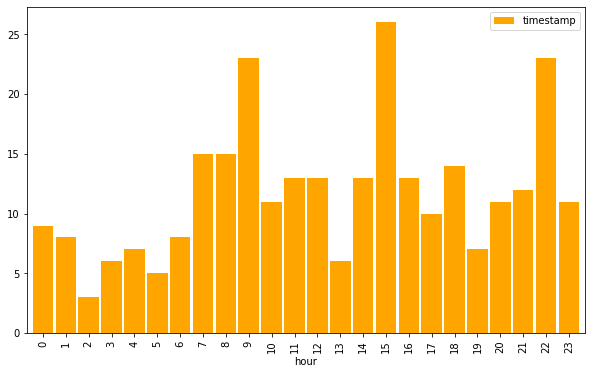

In [0]:
costco.groupby('hour').count().reset_index().plot.bar(x='hour', y='timestamp', color = 'orange', width=0.9, figsize=(10,6));

# Mapping of distribution of customers at Costcos over the hours


We use Folium to map the amount of people around the Costco at any given time. Folium returns a map of an HTML format. We use Chromium to take a screenshot of the maps for every hour. We finally create a GIF of all of screenshots.

In [0]:
!apt update 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,816

In [0]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (81.0.4044.138-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.


In [0]:
!which chromedriver

/usr/bin/chromedriver


In [0]:
!pip install selenium

In [0]:
%%time

import folium
from folium.plugins import HeatMap
import os
from PIL import Image
import time
import random
from selenium import webdriver


costco_map_container = []
shared_folder_path = '/content/drive/My Drive/New_York_Footfall_Analysis/Costco_21_April_half_km_radius/'


for i in tqdm(range(24)):

  #resetting options in order to reset cached cookies of chromedriver or error occurs
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  # open it, go to a website, and get results
  wd = webdriver.Chrome('chromedriver',options=options)

  path = os.getcwd()


  #filtering dataframe per hour
  hour = costco[costco['hour'] == i]

  #instantiating the map
  costco_map = folium.Map(location=[lat, lng],
  tiles='Stamen Toner',
  zoom_start=14)

  #adding mobile points to map 
  HeatMap(data= hour[['lat', 'lng']].groupby(['lat', 'lng']).count().reset_index().values.tolist(), radius=10, max_zoom=13).add_to(costco_map)

  mapfile = f'costco_hour_{i}'

  #saving map as default folium html
  costco_map.save(f'{mapfile}.html')

  #creating pointer towards file loation
  tmpurl=f'file://{path}/{mapfile}.html'

  #getting html map into memory and giving it time to load
  wd.get(tmpurl)
  time.sleep(random.randint(5,8))

  #saving it as screenshot to covert from html to png
  wd.save_screenshot(f'{shared_folder_path}{mapfile}.png')

  wd.quit()

  #opening the screenshot in memory
  im = Image.open(f'{shared_folder_path}{mapfile}.png')

  #getting the heigh 
  width, height = im.size

  #the top left coordinate is 0,0 and the bottom right is (width, height)
  #cropping here
  im = im.crop((int(150), int(150), int(width), int(height)))


  #saving the maps into the list above to fetch them later
  costco_map_container.append(im)

costco_map_container[0].save(f'{shared_folder_path}costco.gif',
               save_all=True, append_images=costco_map_container[1:], optimize=False, duration=40, loop=0)










  





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app



CPU times: user 1.18 s, sys: 337 ms, total: 1.52 s
Wall time: 3min 15s


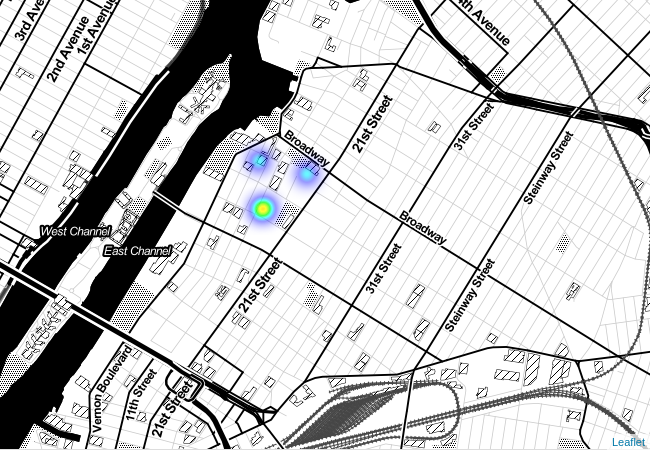

In [0]:
im

# Timeseries Analysis








## Data ingestion

*   We ingest needed columns of the data for 1 day 
*   We filter for r = 0.5KM costco area using the now known coordinates
*   We wrangle data using above defined wrangling function 
*   We groupby week and hour to reduce cardinality and granularity to hour level
*   We save file
*   We delete downloaded files for that day for memory management reasons

In [0]:
%%time

from datetime import datetime
import time
from glob import glob
from tqdm import tqdm_notebook as tqdm
import pandas as pd

#*******************************need to disable unix command output see stack overflow link for error****************
#https://stackoverflow.com/questions/51463383/buffered-data-was-truncated-after-reaching-the-output-size-limit

#creating list of days
days = [i.strftime('%Y/%m/%d') for i in pd.date_range(start='2020/04/21', end = '2020/05/18')]

#columns we will be ingesting
cols = ['timestamp', 'lat', 'lng']

#instantiating empty dataframe to which we will append rows and continuously save for each iteration
#this is to not lose data

df_timeseries = pd.DataFrame({'date' :  [], 
                              'hour' : [],
                              'timestamp' : [],
                              'lat' : [],
                              'lng' : [] })

for day in tqdm(days):

  string = f"20200421/{day}/NYC*"

  !aws s3 cp s3://predicio-samples/data_analytics/ ./ --recursive \
          --exclude "*" --include {string}

  #reading files in directory and reducing cardinality using glob mosude

  for path in glob(f'/content/20200421/{day}/*.gz'):


      df = pd.read_csv(path, delimiter = '\t', error_bad_lines=False, 
                        usecols = cols)

      #filtering for people within 0.5km radius of the costco

      df = df[(df['lat'] > 40.7623) & (df['lat'] < 40.7703)
                & (df['lng'] < -73.9329)  & (df['lng'] > -73.9442)] 

      df = wrangle(df)

      df = df.groupby(['date', 'hour']).count().reset_index()

      df_timeseries = df_timeseries.append(df)


      #saving data at each iteration
      df_timeseries.to_csv('df_timeseries_ny_footfall.csv')
      !cp df_timeseries_ny_footfall.csv '/content/drive/My Drive/New_York_Footfall_Analysis'
    

  #deleting all ingested files for that day once done with the wrangling part of the loop
  !rm -rf /content/20200421/2020/*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


download: s3://predicio-samples/data_analytics/20200421/2020/05/13/NYC-01-part0002.csv.gz to 20200421/2020/05/13/NYC-01-part0002.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/05/13/NYC-00-part0001.csv.gz to 20200421/2020/05/13/NYC-00-part0001.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/05/13/NYC-01-part0001.csv.gz to 20200421/2020/05/13/NYC-01-part0001.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/05/13/NYC-01-part0000.csv.gz to 20200421/2020/05/13/NYC-01-part0000.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/05/13/NYC-00-part0000.csv.gz to 20200421/2020/05/13/NYC-00-part0000.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/05/13/NYC-02-part0002.csv.gz to 20200421/2020/05/13/NYC-02-part0002.csv.gz
download: s3://predicio-samples/data_analytics/20200421/2020/05/13/NYC-02-part0000.csv.gz to 20200421/2020/05/13/NYC-02-part0000.csv.gz
download: s3://predicio-samples/data_analytics/2

## Data exploration

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install pandas-profiling==2.*

     |████████████████████████████████| 266kB 9.6MB/s 
     |████████████████████████████████| 604kB 19.7MB/s 
     |████████████████████████████████| 3.1MB 31.5MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 71kB 12.5MB/s 
     |████████████████████████████████| 296kB 58.0MB/s 
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=ddad5c96de230c23b1bb6b3ba27b3787867584f4f2ec2f85a91245dfa2eae3b7
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=632433d1b02a302b47b402015cc99dc3cf06808eee9f0c28495650365c92e3e6
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=6ffa0bc2bfd451786ac182d5207e2c2022d6071474c9b48881

In [0]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 8.7MB/s 
     |████████████████████████████████| 2.1MB 47.5MB/s 
     |████████████████████████████████| 8.7MB 53.4MB/s 
  Found existing installation: Cython 0.29.18
    Uninstalling Cython-0.29.18:
      Successfully uninstalled Cython-0.29.18
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [0]:
import matplotlib
import pandas as pd
import pandas_profiling
pandas_profiling.__version__

# *****AttributeError: module 'pandas_profiling' has no attribute '__version__' ****
#requires restarting runtime and running cell again

'2.8.0'

## General overview of the data
The assumption is made that each timestamp count is one person over the hours.

In [0]:
costco_footfall = pd.read_csv('/content/drive/My Drive/New_York_Footfall_Analysis/df_timeseries_ny_footfall.csv')
#aggragating counts for same data and hour that were in multiple files

costco_footfall = costco_footfall.groupby(['date','hour']).sum().reset_index().sort_values(['date', 'hour'])
print(costco_footfall.describe(include = 'all').T)
print(costco_footfall.head())
print(costco_footfall.sample(5))
print(costco_footfall.tail())

           count unique         top freq        mean  ...  min  25%  50%  75%   max
date         575     25  2020-05-04   24         NaN  ...  NaN  NaN  NaN  NaN   NaN
hour         575    NaN         NaN  NaN      11.487  ...    0  5.5   11   17    23
Unnamed: 0   575    NaN         NaN  NaN  0.00347826  ...    0    0    0    0     1
timestamp    575    NaN         NaN  NaN     596.103  ...   78  391  587  767  1335
lat          575    NaN         NaN  NaN     596.103  ...   78  391  587  767  1335
lng          575    NaN         NaN  NaN     596.103  ...   78  391  587  767  1335
date_EST     575    NaN         NaN  NaN     596.103  ...   78  391  587  767  1335

[7 rows x 11 columns]
         date  hour  Unnamed: 0  timestamp    lat    lng  date_EST
0  2020-04-21  20.0           0      450.0  450.0  450.0     450.0
1  2020-04-21  21.0           0      391.0  391.0  391.0     391.0
2  2020-04-21  22.0           0      622.0  622.0  622.0     622.0
3  2020-04-21  23.0           0      

In [0]:
from pandas_profiling import ProfileReport
profile = ProfileReport(costco_footfall.reset_index(), minimal=True).to_notebook_iframe()

profile

## Distribution of people at costcos over the hours for 25 days

We plot the sequence of data of customers per hour over a 25 day span. We find that the data is cyclical.We also find that there's a slight upwards trend which probably coincides with the relaxation of lockdown and shelter in place orders.





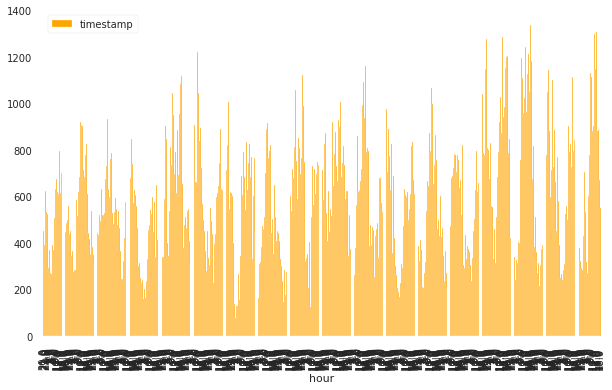

In [0]:
costco_footfall.plot.bar(x='hour', y='timestamp', color = 'orange', width=0.9, figsize=(10,6));

The graph above shows that the data is probably cyclical. Timeseries assume that the variables of the timeseries are stationary i.e.


*   The mean is constant
*   The variance is constant
*   The autocorrolation is constant (a copy of one cycle of the timeseries has a constant factor to another copy of the timeseries)

Timeseries quickly go wrong when generalising to data with different variables.


We will statically prove that the data is stationary i.e. there is autocorrelation using Dickey-Fuller test. The null-hypothesis is that the timeseries is non-stationary. 

We are dealing with small time series seasonal data. We will use tools built for seasonal time series analysis



*   SARIMA
*   Facebook Prophet
*   LSTM

Finally, we compare their errors to the historical median and see which forecast method performs best. We will then make predictions for the next 25 days. We will use 5 days of testing data to make the model comparison.



In [0]:
from statsmodels.tsa.stattools import adfuller

#https://medium.com/@BonnieMa/time-series-modeling-with-arima-to-predict-future-house-price-9b180c3bbd2fs
#https://machinelearningmastery.com/time-series-data-stationary-python/

dftest_stat = adfuller(costco_footfall['timestamp'])[0]
p_value = adfuller(costco_footfall['timestamp'])[1]
print(f' The augmented Dickey-Fuller statistic is {dftest_stat} and the p-value is {p_value}')

 The augmented Dickey-Fuller statistic is -4.326043266158815 and the p-value is 0.00040027781371446516


The p-value is less than 0.05 so we fail to reject the null hypothesis stating that this time series is not stationary. This time series is stationary and time series models will work well with this data.

## Train and testing dataframes

In [0]:
dates = costco_footfall['date'].unique()
train = costco_footfall[costco_footfall['date'] <= dates[19]]
test = costco_footfall[costco_footfall['date'] > dates[19]]
train.shape, test.shape

((460, 7), (115, 7))


## Median distribution of people at costco over the hours for 25 days
We take the median amount of customers over the days to punish outliers which would make hours skew a certain way. This can also be used as baseline prediction for our [short timeseries analysis](https://stats.stackexchange.com/questions/135061/best-method-for-short-time-series)

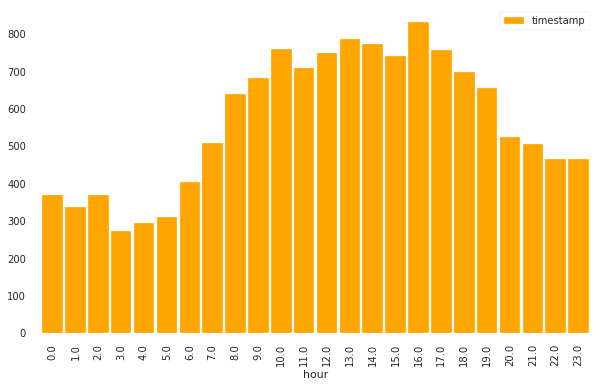

In [0]:
costco_footfall.groupby('hour').median().reset_index().plot.bar(x='hour', y='timestamp', color = 'orange', width=0.9, figsize=(10,6));

## Historical Median Timeseries Analysis

In [0]:
def timeline(days, n):
  
  series = []

  for i in range (n):
    for hour in days:
      series.append(hour)

  return series

  

In [0]:
day = train.groupby('hour').median().reset_index()['timestamp'].tolist()
hist_median_pred = timeline(day, 7)[:115]

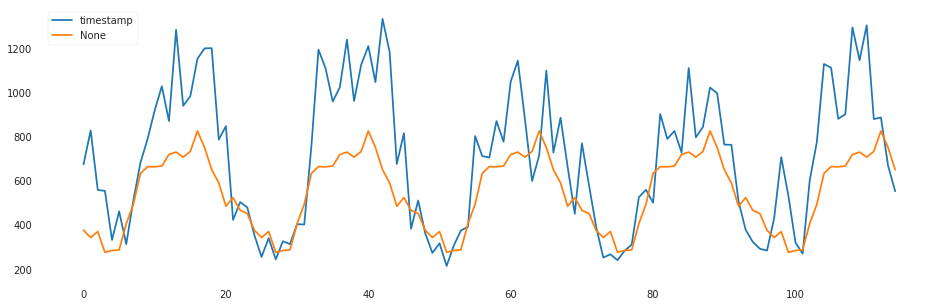

In [0]:
test.reset_index()['timestamp'].plot(figsize = (16,5), legend=True)
pd.Series(hist_median_pred).plot(legend = True);

##  SARIMA Timeseries Analysis


[SARIMA HAS 7 different parameters p,d,q and P, D, Q and m.](https://https://medium.com/@BonnieMa/time-series-modeling-with-arima-to-predict-future-house-price-9b180c3bbd2f). We  use autoarima to calculate the best values of these parameters

In [0]:
from pmdarima import auto_arima 

# Per the formula SARIMA(p,d,q)x(P,D,Q,s), the parameters for these types of models are as follows:
# p and seasonal P: indicate number of autoregressive terms (lags of the stationarized series)
# d and seasonal D: indicate differencing that must be done to stationarize series
# q and seasonal Q: indicate number of moving average terms (lags of the forecast errors)
# m: indicates periodicity of the time series (4 for quarterly, 12 for yearly)

auto_arima(costco_footfall['timestamp'], seasonal=True, m=12).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmo

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  575
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -3692.592
Date:                              Wed, 27 May 2020   AIC                           7399.185
Time:                                      11:03:32   BIC                           7429.653
Sample:                                           0   HQIC                          7411.069
                                              - 575                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1455      0.075      1.935      0.053      -0.002       0.293
ar.L1          0.7312      0.048     15.339      0.000       0.638       0.825
ma.L1         -1.2115      0.127     -9.529      0.000      -1.461      -0.962
ma.L2          0.2117      0.073      2.884      0.004       0.068       0.356
ar.S.L12      -1.0000      0.001   -759.618      0.000      -1.003      -0.997
ma.S.L12       0.9967      0.115      8.667      0.000       0.771       1.222
sigma2      2.135e+04   3.38e-06   6.32e+09      0.000    2.13e+04    2.13e+04
===================================================================================
Ljung-Box (Q):                       47.95   Jarque-Bera (JB):                34.62
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.53
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.88e+25. Standard errors may be unstable.
"""

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

arima_model = SARIMAX(train['timestamp'], order = (1,1,2), seasonal_order = (1,0,1,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            timestamp   No. Observations:                  460
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -2934.049
Date:                              Wed, 27 May 2020   AIC                           5880.098
Time:                                      11:03:34   BIC                           5904.872
Sample:                                           0   HQIC                          5889.855
                                              - 460                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7171      0.055     13.043      0.000       0.609       0.825
ma.L1         -1.1798      0.177     -6.649      0.000      -1.528      -0.832
ma.L2          0.1800      0.081      2.216      0.027       0.021       0.339
ar.S.L12      -1.0000      0.002   -428.937      0.000      -1.005      -0.995
ma.S.L12       0.9966      0.159      6.256      0.000       0.684       1.309
sigma2      1.955e+04   7.02e-06   2.79e+09      0.000    1.95e+04    1.95e+04
===================================================================================
Ljung-Box (Q):                       52.01   Jarque-Bera (JB):                34.08
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.51
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.07e+24. Standard errors may be unstable.
"""

In [0]:

#give the model the last date of the training data and range of predictions as parameters

arima_pred = arima_result.predict(start = len(train), end = len(costco_footfall)-1).rename("ARIMA Predictions").reset_index(drop = True)
arima_pred

0      653.882379
1      567.206435
2      508.868663
3      472.799676
4      405.183133
          ...    
110    744.676888
111    748.851525
112    793.588380
113    753.502285
114    661.518658
Name: ARIMA Predictions, Length: 115, dtype: float64

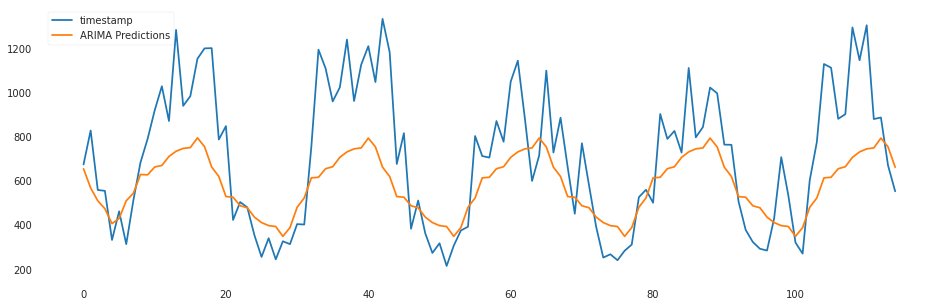

In [0]:
test.reset_index()['timestamp'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

## Facebook Prophet Timeseries Analysis

In [0]:
#https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887
#formatting data into facebook prophet format
df_prophet = train[['date', 'timestamp']].rename(columns = {'date' : 'ds', 'timestamp' : 'y'})
df_prophet.head()


,ds,y
0,2020-04-21,450.0
1,2020-04-21,391.0
2,2020-04-21,622.0
3,2020-04-21,533.0
4,2020-04-22,525.0


In [0]:
from fbprophet import Prophet

#the ds columns is in the library format. The values of the predicions matter not so much the dates.
m = Prophet(daily_seasonality=True)
m.fit(df_prophet)

#setting frequency to hour
future = m.make_future_dataframe(periods=(len(test)), freq='H')

forecast = m.predict(future)

#prophet appends the pred to the dataframe
facebook_pred = forecast.tail(len(test)).reset_index()['yhat']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


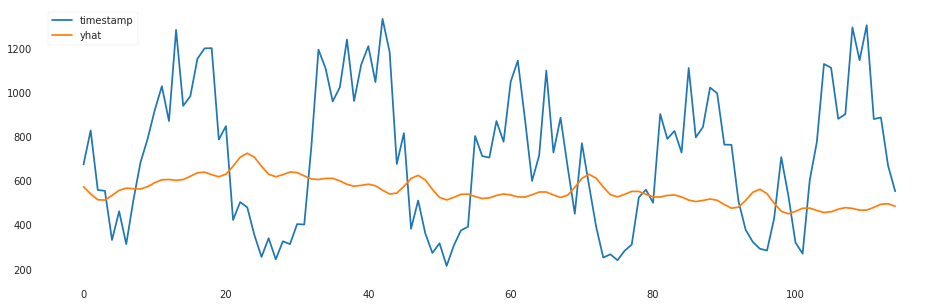

In [0]:
test.reset_index()['timestamp'].plot(figsize = (16,5), legend=True)
facebook_pred.plot(legend = True);

## LSTM Timeseries Analysis

In [0]:
# https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/


# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


Using TensorFlow backend.


In [0]:
%%time

# choose a number of features and time steps

n_features, n_steps = (1,12)
# split into samples
X, y = split_sequence(train['timestamp'], n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
# reshaping from row, column to array, row, column (going from 2D matrix to 3D array)

X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model, but should refractor to avoid bias/overfitting
model.fit(X, y, epochs=100, verbose=0)



CPU times: user 26.3 s, sys: 5.67 s, total: 32 s
Wall time: 12.6 s


In [0]:
#getting testing data + n_steps of training data becuase LSTM uses rolling n_steps to make predictions
x_input = np.asarray(train['timestamp'][-n_steps:].tolist() + test['timestamp'].tolist())
#getting testing data into same format as training data using above function
x_input = split_sequence(x_input, n_steps)[0]
#formating 3D array
x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))
#making predictions
lstm_pred = model.predict(x_input, verbose=0)

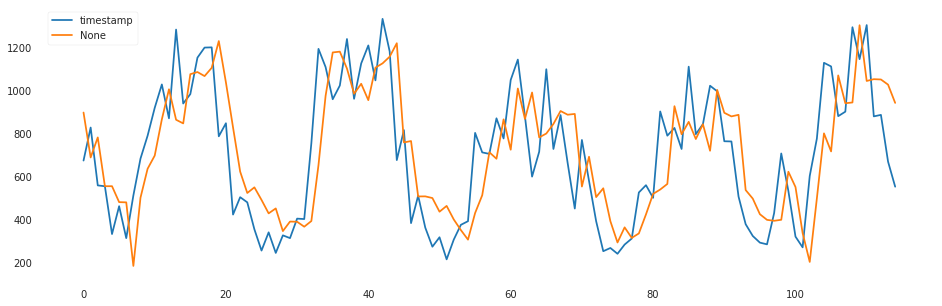

In [0]:
test.reset_index()['timestamp'].plot(figsize = (16,5), legend=True);
pd.Series(lstm_pred.T[0]).plot(legend = True);

## Timeseries evaluation

[We will be using the root mean square error.](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_hist_med = sqrt(mean_squared_error(test['timestamp'], hist_median_pred))
rmse_arima = sqrt(mean_squared_error(test['timestamp'], arima_pred))
rmse_facebook = sqrt(mean_squared_error(test['timestamp'], facebook_pred))
rmse_lstm = sqrt(mean_squared_error(test['timestamp'], lstm_pred))

print(rms_hist_med, rmse_arima, rmse_facebook, rmse_lstm)

234.14638212210232 250.02604954503457 358.44760330861567 218.6590501171281


The historical median outperformed out of the box SARIMA and Facebook Prophet. It only came second to LSTM, but outperforms LSTM too in terms of cost and time. [We can unsurprinsingly conclude that sometimes basic models can really outperform more complex models.](https://stats.stackexchange.com/questions/124955/is-it-unusual-for-the-mean-to-outperform-arima) 